In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# makes printing more human-friendly
np.set_printoptions(precision=3, suppress=True)

In [3]:
data1 = {
    'x': np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])[:, None],
    'y': np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
}

data2 = {
    'x': np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])[:, None],
    'y': np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
}

data3 = {
    'x': np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])[:, None],
    'y': np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
}

data4 = {
    'x': np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])[:, None],
    'y': np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
}

In [4]:
# 1a) Fit the data using the LinearRegression model
model1 = LinearRegression()
model1.fit(data1['x'], data1['y'])
print(model1.coef_, model1.intercept_)

[0.5] 3.0000909090909103


In [5]:
# 1b) Predict and measure R2 scores
yhat1 = model1.predict(data1['x'])   # Refer to LinearRegression.predict()
rsqr1 = r2_score(data1['y'], yhat1)   # Compute R-square between ground-truth data1['y'] and predictions yhat1
w1, b1 = model1.coef_, model1.intercept_
print(f'Model 1: y = {w1[0]:.2f}x + {b1:.2f} \t R2 = {rsqr1:.2f}')

Model 1: y = 0.50x + 3.00 	 R2 = 0.67


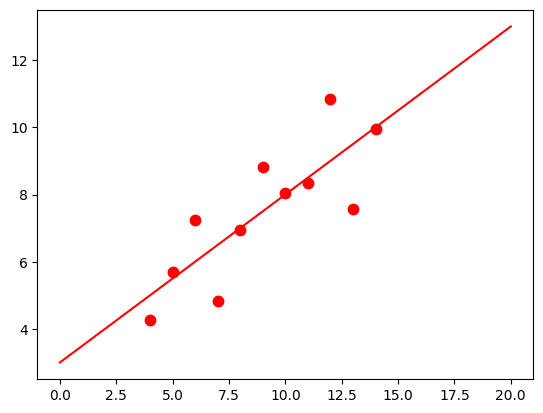

In [6]:
# 1c) Plot the data and predictions
x_range = np.linspace(0, 20, 100)[:, None]
plt.plot(data1['x'], data1['y'], 'r.', ms=15);
plt.plot(x_range, model1.predict(x_range), 'r-')

In [7]:
# 1d) Compute the linear regression for other datasets
model2 = LinearRegression().fit(data2['x'], data2['y'])
yhat2 = model2.predict(data2['x'])
rsqr2 = r2_score(data2['y'], yhat2)
w2, b2 = model2.coef_, model2.intercept_
print(f'Model 2: y = {w2[0]:.2f}x + {b2:.2f} \t R2 = {rsqr2:.2f}')

model3 = LinearRegression().fit(data3['x'], data3['y'])
yhat3 = model3.predict(data3['x'])
rsqr3 = r2_score(data3['y'], yhat3)
w3, b3 = model3.coef_, model3.intercept_
print(f'Model 3: y = {w3[0]:.2f}x + {b3:.2f} \t R2 = {rsqr3:.2f}')

model4 = LinearRegression().fit(data4['x'], data4['y'])
yhat4 = model4.predict(data4['x'])
rsqr4 = r2_score(data4['y'], yhat4)
w4, b4 = model4.coef_, model4.intercept_
print(f'Model 4: y = {w4[0]:.2f}x + {b4:.2f} \t R2 = {rsqr4:.2f}')

Model 2: y = 0.50x + 3.00 	 R2 = 0.67
Model 3: y = 0.50x + 3.00 	 R2 = 0.67
Model 4: y = 0.50x + 3.00 	 R2 = 0.67


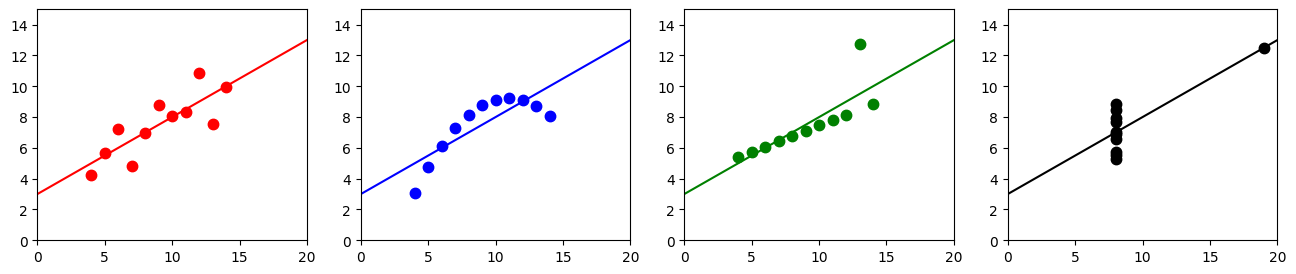

In [8]:
# e) Plot all datasets and linear regression line
x_range = np.linspace(0, 20, 100)[:, None]

f, ax = plt.subplots(1, 4, figsize=(16, 3))
ax[0].plot(data1['x'], data1['y'], 'r.', ms=15)
ax[0].plot(x_range, model1.predict(x_range), 'r-')
ax[1].plot(data2['x'], data2['y'], 'b.', ms=15)
ax[1].plot(x_range, model2.predict(x_range), 'b-')
ax[2].plot(data3['x'], data3['y'], 'g.', ms=15)
ax[2].plot(x_range, model3.predict(x_range), 'g-')
ax[3].plot(data4['x'], data4['y'], 'k.', ms=15)
ax[3].plot(x_range, model4.predict(x_range), 'k-')
for axes in ax:
    axes.set_xlim(0, 20);
    axes.set_ylim(0, 15);

# Discuss observations


The $R^2$ values are the same for all models  
Not all models seem like good fits, for example data2 looks like an exponential curve that could be fit better  
I would not be able to tell if linear regression is a good fit without plotting  
A exponential model would better fit data2  

# Question 4a-d

### Question 4a:  

A logistic regression model estimates the probability that a given input $ x $ belongs to the positive class $ Y = 1 $ using the **sigmoid function**:

$$
P(Y = 1 | x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

where:
- $ w $ is the vector of coefficients,
- $ b $ is the bias term,
- $ x $ is the input feature vector,
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the sigmoid function.

### Question 4b:  

In cases where the cost of a **false negative** is much higher than that of a **false positive**, we should **lower** the decision threshold $ p_{\text{thr}} $. 

- The default threshold is $ p_{\text{thr}} = 0.5 $.
- Lowering $ p_{\text{thr}} $ (e.g., to 0.3) means the model will classify more samples as **positive**, reducing false negatives.
- This ensures that more potentially positive cases (such as patients with a serious medical condition) are flagged.



### Question 4c:  

The decision boundary is the set of points where the model predicts the probability to be exactly \( p_{\text{thr}} \):

$$
P(Y = 1 | x) = p_{\text{thr}}
$$

Substituting the sigmoid function:

$$
\frac{1}{1 + e^{-(w^T x + b)}} = p_{\text{thr}}
$$

Rearrange:

$$
1 + e^{-(w^T x + b)} = \frac{1}{p_{\text{thr}}}
$$

$$
e^{-(w^T x + b)} = \frac{1}{p_{\text{thr}}} - 1
$$

Taking the natural logarithm on both sides:

$$
-(w^T x + b) = \ln\left(\frac{1}{p_{\text{thr}}} - 1\right)
$$

$$
w^T x + b = -\ln\left(\frac{1}{p_{\text{thr}}} - 1\right)
$$

Since this equation is of the form $ w^T x + b = \text{constant} $, it represents a **hyperplane**, confirming that the decision boundary is always linear.

### Question 4d:  

For a 2D feature space where $ x = (x_1, x_2) $, the decision boundary equation is:

$$
w_1 x_1 + w_2 x_2 + b = -\ln\left(\frac{1}{p_{\text{thr}}} - 1\right)
$$

Solving for $ x_2 $ in terms of $ x_1 $:

$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b + \ln\left(\frac{1}{p_{\text{thr}}} - 1\right)}{w_2}
$$

Comparing with the standard line equation $ x_2 = m x_1 + c $, we get:

- **Slope**: $ m = -\frac{w_1}{w_2} $
- **Intercept**: $ c = -\frac{b + \ln\left(\frac{1}{p_{\text{thr}}} - 1\right)}{w_2} $

This equation defines a straight line, confirming the linear decision boundary.